<h1>Wheat & Wild Oat Recognition using Convolutional Neural Network.</h1>

## *Problem Statement*:
This model diffrentiates between Wild Oat & Wheat using our collected <a href="https://github.com/BonyGeorge/Wheat-Impurities-Detection/tree/master/DataSets/Dataset%201"> Wild Oat Dataset</a> and Global wheat detection <a href=""> Wheat Dataset</a>.

## *Authors*:
<ul>
    <li>Nour Bahaa</li>
    <li>Mai Mahmoud</li>
    <li>Ibrahim Fawzy</li>
    <li>Abanoub George</li>
</ul>

## *Supervisors*:
<ul>
    <li>Prof. Khaled Hussien</li>
    <li>Eng. Hager Sobeah</li>
    <li>Eng. Nour el-huda Ashraf</li>
</ul>



### Importing the main libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

train_images = '/media/abanoublamie/5E76093A76091485/ssss/testing/Wheat & Wild Oats/train'
test_images = '/media/abanoublamie/5E76093A76091485/ssss/testing/Wheat & Wild Oats/validation'

Using TensorFlow backend.


### Pre-processing on the Trainning set (*Image Augmentation*)
We are applying some geometerical tranformation to move the pixels to prevent overfitting of the model (Zoom In, Zoom Out, Rotations). 

In [2]:
train_datagenarator = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

trainning_set = train_datagenarator.flow_from_directory(train_images,
                                                         target_size = (64, 64),
                                                         batch_size = 15,
                                                         class_mode = 'binary')

Found 460 images belonging to 2 classes.


### Pre-processing on the Test set

In [3]:
test_datagenarator = ImageDataGenerator(rescale = 1./255)
test_set = test_datagenarator.flow_from_directory(test_images,
                                                   target_size = (64, 64),
                                                   batch_size = 5,
                                                   class_mode = 'binary')

Found 200 images belonging to 2 classes.


### CNN init
Intiating Our Convolutional Neural Network

In [4]:
cnn = tf.keras.models.Sequential()

###  Convolution Layer
Feature Mapping (Applying filters), the activation function(ReLu) is responsible for performance enhancement because, it will output if positive, otherwise, it will output zero 

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,
                               kernel_size=3,
                               activation='relu',
                               input_shape=[64, 64, 3]))

###  Pooling Layer (Max Pooling)
Detect the features in any postition, background, light, texture and pattern

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

###  Dropout Layer
Prevents the model from overfitting

In [7]:
cnn.add(tf.keras.layers.Dropout(0.25))

### Adding a second convolutional layer & poolin layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,
                               kernel_size=3,      # Kernal Size is the width and height of the 2D convolution window.

                               activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Flattening
Rotate the matrix to a column matrix for future use of the ANN

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Full Connection
Matching the features with the classes to make a prediction. (units= Hidden Neurons)

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

###  Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Compiling the CNN
We used Adam Optimizer to update network weights iterative based in training data.

In [12]:
cnn.compile(loss='categorical_crossentropy',
            optimizer='Adam',
            metrics =['accuracy'])

### CNN Summary

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               8

### Trainning the CNN on the Trainning set and evaluating it on the Test set

In [14]:
history = cnn.fit(x = trainning_set,
                  validation_data = test_set,
                  epochs = 30)

Train for 31 steps, validate for 40 steps
Epoch 1/30
31/31 [==============================] - 12s 390ms/step - loss: 6.3824e-08 - accuracy: 0.4804 - val_loss: 5.9605e-08 - val_accuracy: 0.7300
Epoch 2/30
31/31 [==============================] - 11s 357ms/step - loss: 6.3824e-08 - accuracy: 0.4609 - val_loss: 5.9605e-08 - val_accuracy: 0.7300
Epoch 3/30
31/31 [==============================] - 11s 358ms/step - loss: 6.3824e-08 - accuracy: 0.4739 - val_loss: 5.9605e-08 - val_accuracy: 0.7300
Epoch 4/30
31/31 [==============================] - 11s 360ms/step - loss: 6.3824e-08 - accuracy: 0.4630 - val_loss: 5.9605e-08 - val_accuracy: 0.7300
Epoch 5/30
31/31 [==============================] - 11s 360ms/step - loss: 6.3824e-08 - accuracy: 0.4609 - val_loss: 5.9605e-08 - val_accuracy: 0.7300
Epoch 6/30
31/31 [==============================] - 11s 356ms/step - loss: 6.3824e-08 - accuracy: 0.4826 - val_loss: 5.9605e-08 - val_accuracy: 0.7300
Epoch 7/30
31/31 [==============================] - 

### Getting the Average accuracy among all the stages (epochs)

In [15]:
Avg_Acc = np.mean(history.history['accuracy'])
print("The Average Accuracy : ", round(Avg_Acc * 100, 2),' %')

The Average Accuracy :  47.12  %


### Plotting the Accuracy among all the epochs

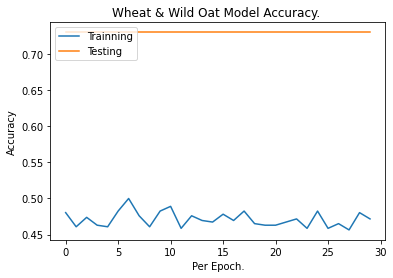

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Wheat & Wild Oat Model Accuracy. ')
plt.xlabel('Per Epoch.')
plt.ylabel('Accuracy')
plt.legend(['Trainning', 'Testing'], loc='upper left')
plt.show()

##  Making a prediction

In [ ]:
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/test3.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0][0] == 1:
  prediction = 'Wheat Plant.'
else:
  prediction = 'Wild Oat Plant.'

In [ ]:
from IPython.display import Image
Image(filename='dataset/single_prediction/test3.jpeg', width=400, height=300)

In [ ]:
print(prediction)

In [17]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    'dataset2/test_set', # Put your path here
     target_size=(64, 64),
    batch_size=15,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = cnn.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 40 images belonging to 2 classes.


In [18]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())  
print(class_labels)

['wheat', 'wild oat']


In [19]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels, zero_division=0)
print(report)    

              precision    recall  f1-score   support

       wheat       0.75      1.00      0.86        30
    wild oat       0.00      0.00      0.00        10

    accuracy                           0.75        40
   macro avg       0.38      0.50      0.43        40
weighted avg       0.56      0.75      0.64        40



<center><b>End of Notebook.</b></center>